In [1]:
'''
 * 
 * author Dishant Mittal
 * created on June 10, 2018
 * project MSCI 641
 
 * latent Dirichlet allocation (LDA) is a generative statistical model that allows sets of 
 * observations to be explained by unobserved groups that explain why some parts of the data 
 * are similar. For example, if observations are words collected into documents, it posits 
 * that each document is a mixture of a small number of topics and that each word's presence 
 * is attributable to one of the document's topics. LDA is an example of a topic model.
 
 * In this script, I load the data, clean it, use TFIDF for further cleaning, create bigrams and trigrams,
 * remove stop words removal,train a LDA Model, compute topic coherence and perplexity scores.
 '''


import networkx as nx
import matplotlib.pyplot as plt
import pylab
# from __future__ import division
import matplotlib as mpl
import pandas as pd
from operator import itemgetter
import csv
import nltk; nltk.download('stopwords')
from nltk.corpus import stopwords
import pandas as pd
import re
import numpy as np
import pandas as pd
import sys
print(sys.executable)
import pandas as pd
import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
# from symspellpy.symspellpy import SymSpell, Verbosity
import spacy
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
import logging
import os
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
pd.set_option('display.max_columns', 136)
pd.set_option('display.max_colwidth', -1)
from nltk.corpus import stopwords, names
import re, unicodedata
from nltk.corpus import names

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/dishant/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/home/dishant/anaconda3/bin/python


# Import data

In [2]:
                                                    #READING THE DATA
df1=pd.read_csv('./all-the-news/articles1.csv', index_col = False)
df2=pd.read_csv('./all-the-news/articles2.csv', index_col = False)
df3=pd.read_csv('./all-the-news/articles3.csv', index_col = False)
df=df1
df=df1.append(df2) 
df=df.append(df3)

# df.head()

# df=df.drop(['Unnamed: 0'], axis=1).reset_index(drop=True)
df = df.dropna(subset=['content']).reset_index(drop=True)#drop rows where col value is nan
df = df.loc[df['content']!=' '].reset_index(drop=True)
df = df.loc[df['content']!=''].reset_index(drop=True)
# print(df[df["content"].isnull()])   #this statement will return null now because we have already dropped null/nan values
# print("loaded")
print(df.shape)
# df.shape   #TFIDF initialization does not hangs till 24000 emails


(142567, 10)


In [54]:
df = df.rename(columns={'content': 'body'})

In [ ]:
                                                        #TESTING
#checking, how the cleaning results are
df.ix[46,'body']
df.ix[146,'body']
df.ix[246,'body']
df.ix[346,'body']
df.ix[546,'body']
df.ix[46,'body']

# Basic text cleaning using Gensim module

In [57]:
                                                # BASIC TEXT CLEANING USING GENSIM MODULE

data = list(df['body'])


print(data[43])


pprint(data[:1])

def sent_to_words(sentences):
    for sentence in sentences:
        # converts a document into a list of lowercase tokens, ignoring tokens that are too short or too long
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) #Remove accent marks from tokens

data_words = list(sent_to_words(data))

################### drop empty emails after cleaning...

def update_dataframe(dataframe, list_of_lists):
    i=-1
    total_l=[]
    for y in list_of_lists:
        i=i+1
        if len(y) ==0:
            total_l.append(i)
            # print(i)
    # print(len(total_l))
    return dataframe.drop(dataframe.index[total_l]).reset_index(drop=True),[x for x in list_of_lists if x != []]

df,data_words=update_dataframe(df, data_words)

######################

print(data_words[:1])
print("done")

■   Donald J. Trump appears to side with the WikiLeaks founder Julian Assange over United States intelligence agencies, with Vice   Mike Pence backing him up. ■ She’s hired: Omarosa Manigault gets a White House post, as do some notable Trump loyalists. But Mr. Trump is leaning on Republican veterans in the Oval Office’s top slots. ■ The   finds something “very strange” about his intelligence briefing on Friday  —   even though the White House says it was always planned for Friday. For the Republican Party, Mr. Assange, the WikiLeaks founder, was once purely a villain. He found little sympathy with conservatives after he leaked American military secrets from Iraq, published purloined diplomatic cables that could have gotten American sources killed and sought refuge in the Ecuadorean Embassy in London, fleeing charges of rape. But now, Mr. Trump appears to be siding with Mr. Assange over the conclusions of America’s intelligence services. Mr. Assange appeared on Fox News on Tuesday night

[['washington', 'congressional', 'republicans', 'have', 'new', 'fear', 'when', 'it', 'comes', 'to', 'their', 'health', 'care', 'lawsuit', 'against', 'the', 'obama', 'administration', 'they', 'might', 'win', 'the', 'incoming', 'trump', 'administration', 'could', 'choose', 'to', 'no', 'longer', 'defend', 'the', 'executive', 'branch', 'against', 'the', 'suit', 'which', 'challenges', 'the', 'administration', 'authority', 'to', 'spend', 'billions', 'of', 'dollars', 'on', 'health', 'insurance', 'subsidies', 'for', 'and', 'americans', 'handing', 'house', 'republicans', 'big', 'victory', 'on', 'issues', 'but', 'sudden', 'loss', 'of', 'the', 'disputed', 'subsidies', 'could', 'conceivably', 'cause', 'the', 'health', 'care', 'program', 'to', 'implode', 'leaving', 'millions', 'of', 'people', 'without', 'access', 'to', 'health', 'insurance', 'before', 'republicans', 'have', 'prepared', 'replacement', 'that', 'could', 'lead', 'to', 'chaos', 'in', 'the', 'insurance', 'market', 'and', 'spur', 'politic

In [58]:
def computeIDF(docList):
    import math
    idfDict = {}
    N = len(docList)
    #Count N of docs that contain word w
    idfDict = dict.fromkeys(docList[0].keys(),0)
    for doc in docList:
        for word, val in doc.items():
            if val > 0:
                idfDict[word] +=1
    for word, val in idfDict.items():
        idfDict[word] = math.log(N/ float(val))
    return idfDict

# Further Cleaning using TFIDF

In [59]:
            ########################################################TFIDF:########################################################
# A high weight in tf–idf is reached by a high term frequency (in the given document) and a 
# low document frequency of the term in the whole collection of documents; the weights hence 
# tend to filter out common terms. Since the ratio inside the idf's log function is always 
# greater than or equal to 1, the value of idf (and tf–idf) is greater than or equal to 0. 
# As a term appears in more documents, the ratio inside the logarithm approaches 1, bringing 
# the idf and tf–idf closer to 0.

print("TFIDF 0")
if not data_words:
    print("Data Words is empty")

word_set = set(data_words[0])
for sublist in data_words:#just 1 redundant iteration over just the first item of the list..
    word_set=word_set.union(set(sublist))

#create wordcounts for wordset for each of the dictionaries.
#insidious bug...the following will lead to same object repeated df.shape[0] times
# word_dicts=[dict.fromkeys(word_set, 0)] * df.shape[0]
word_dicts=[]
# count=1
for x in range(len(data_words)):
    # print(count)
    # count=count+1
    word_dicts.append(dict.fromkeys(word_set, 0))

print("TFIDF 1")
for index, doc in enumerate(data_words):
    # print(index,doc)
    for word in doc:
        word_dicts[index][word]+=1
    # print(word_dicts)

#Computing TFs
print("TFIDF 2")
def computeTF(wordDict,bow):
    tfDict = {}
    bowCount = len(bow)
    if bowCount==0:
        print("SOMETHING WAS 0")
    for word,count in wordDict.items():
        tfDict[word] = count / float(bowCount)
    return tfDict


term_freq_dicts=[]
for index, doc in enumerate(data_words):
    # print(index)
    # print(len(doc))
    term_freq_dicts.append(computeTF(word_dicts[index], doc))

print("TFIDF 3")


idfs = computeIDF(word_dicts)

print("TFIDF 4")

def computeTFIDF(tfBow,idfs):
    tfidf = {}
    for word, val in tfBow.items():
        tfidf[word] = val * idfs[word]
    return tfidf

tfidf_dicts=[]
for doc_tf in term_freq_dicts:
    tfidf_dicts.append(computeTFIDF(doc_tf,idfs))

print("TFIDF 5")

TF = pd.DataFrame(tfidf_dicts)#this statement takes some time

TF.to_csv("tfidf.csv",index=False)
print("done")


TFIDF 0
TFIDF 1
TFIDF 2
TFIDF 3
TFIDF 4
TFIDF 5
done


In [60]:
TF=pd.read_csv("tfidf.csv", index_col = False)
print("TF loaded")
#################################################BACKUP!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!#####################
# maintain a copy of TF
TF_backup=TF.copy()
#################################################################################################################################
# TF.head(n=50)

x=list(TF.columns)
x=list(TF.when)
################### REMOVE LESS IMPORTANT WORDS FROM data_words

#drop all the columns which contain more than 90% 0.0 values in their respective columns...more 0.0 means the column word is very common in the emails
non_zero_counts=TF.astype(bool).sum(axis=0)
non_zero_counts=pd.DataFrame({'cols':non_zero_counts.index, 'non_zeroes':non_zero_counts.values}).reset_index(drop=True)
# non_zero_counts.loc[non_zero_counts['cols']=='for']
# len(data_words)

print("TFIDF 6")
#tracking only those columns in TF which are less than 5% of TF size
alpha=0.01  #if want to drop words which are very very... common reduce this value
non_zero_counts = non_zero_counts.loc[non_zero_counts['non_zeroes'] <= len(TF) * alpha].reset_index(drop=True)
delete_cols = list(non_zero_counts.cols)

filtered_data_words=[]
for l in data_words:
    l3 = [x for x in l if x not in delete_cols]
    filtered_data_words.append(l3)

# len(filtered_data_words)
#with alpha = 0.1 words like 'for', 'it', 'not', 'we' are still appearing.
#so we reduce the value of alpha to 
filtered_data_words[10]
data_words[10]

# sum=0
# for x in data_words:
#     sum+=len(x)

# sum
# sum=0
# for x in filtered_data_words:
#     sum+=len(x)

# sum

# sum=0
# for x in BACKUP:
#     sum+=len(x)

# sum
################################################# BACKUP!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!#####################

data_words_backup=data_words

#######################################################################################################################
data_words = filtered_data_words
print(data_words)
print("TFIDF 7")


TF loaded
TFIDF 6


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [61]:
print(delete_cols)

['aaa', 'aback', 'abadi', 'abandoning', 'abated', 'abates', 'abbas', 'abbey', 'abbreviation', 'abcs', 'abdel', 'abdicate', 'abdomen', 'abducted', 'abducting', 'abdul', 'abdulgadir', 'abdulkarim', 'abdullah', 'abe', 'abed', 'abedin', 'abella', 'abels', 'abenakis', 'abenaquis', 'abernethy', 'abetted', 'abhor', 'abide', 'abiding', 'abigail', 'abilities', 'ablaze', 'abnormal', 'abnormalities', 'abolished', 'abolishing', 'abolitionist', 'abolitionists', 'abords', 'aboriginal', 'aboriginals', 'abort', 'aborted', 'abortions', 'abound', 'abraham', 'abramovich', 'abrupt', 'abruptly', 'absent', 'absentia', 'absolved', 'absorbed', 'absorbing', 'absorbs', 'abstinence', 'abstract', 'abstraction', 'absurdist', 'absurdity', 'abu', 'abundance', 'abundant', 'abuser', 'abusing', 'abusive', 'abusively', 'abysmal', 'academies', 'acceded', 'accelerates', 'accelerating', 'acceleration', 'accelerometers', 'acceptances', 'accepts', 'accessed', 'accessing', 'accessories', 'accessory', 'accidentally', 'accident

In [ ]:
                                                    #STOP WORDS DICTIONARY
## Negation
negate_words = {'no', 'not', 'without', 'never', 'nobody', 'nothing', 'none', 'neither', 'nor', 'cannot'}

## File extensions, such as ".pdf", ".docx"
extension_words = {
    '.aif', '.cda', '.mid', '.midi', '.mp3', '.mpa', '.ogg', '.wav', '.wma', '.wpl', '.7z', '.arj', '.deb', '.pkg',
    '.rar', '.rpm', '.z', '.zip', '.bin', '.dmg', '.iso', '.toast', '.vcd', '.csv', '.dat', '.db', '.dbf',
    '.log', '.mdb', '.sav', '.sql', '.tar', '.gz', '.xml', '.apk', '.bat', '.bin', '.cgi', '.pl', '.com', '.exe',
    '.gadget', '.jar', '.py', '.wsf', '.fnt', '.fon', '.otf', '.ttf', '.ai', '.bmp', '.gif', '.ico', '.jpeg', '.jpg',
    '.png', '.ps', '.psd', '.svg', '.tif', '.tiff', '.asp', '.aspx', '.cer', '.cfm', '.cgi', '.pl', '.css', '.htm',
    '.html', '.js', '.jsp', '.part', '.php', '.py', '.rss', '.xhtml', '.key', '.odp', '.pps', '.ppt', '.pptx',
    '.c', '.class', '.cpp', '.cs', '.h', '.java', '.sh', '.swift', '.vb', '.ods', '.xlr', '.xls', '.xlsx',
    '.bak', '.cab', '.cfg', '.cpl', '.cur', '.dll', '.dmp', '.drv', '.icns', '.ico', '.ini', '.lnk', '.msi', '.sys',
    '.tmp', '.3g2', '.3gp', '.avi', '.flv', '.h264', '.m4v', '.mkv', '.mov', '.mp4', '.mpg', '.mpeg', '.rm', '.swf',
    '.vob', '.wmv', '.doc', '.docx', '.odt', '.pdf', '.rtf', '.tex', '.txt', '.wks', '.wps', '.wpd'}

## Internet domains, such as ".com", ".ca"
domain_words = {
    '.com', '.org', '.net', '.int', '.edu', '.gov', '.mil', '.arpa',
    '.ac', '.ad', '.ae', '.af', '.ag', '.ai', '.al', '.am', '.an', '.ao', '.aq', '.ar', '.as', '.at', '.au', '.aw',
    '.ax', '.az', '.ba', '.bb', '.bd', '.be', '.bf', '.bg', '.bh', '.bi', '.bj', '.bl', '.bm', '.bn', '.bo', '.bq',
    '.br', '.bs', '.bt', '.bv', '.bw', '.by', '.bz', '.ca', '.cc', '.cd', '.cf', '.cg', '.ch', '.ci', '.ck', '.cl',
    '.cm', '.cn', '.co', '.cr', '.cu', '.cv', '.cw', '.cx', '.cy', '.cz', '.de', '.dj', '.dk', '.dm', '.do', '.dz',
    '.ec', '.ee', '.eg', '.eh', '.er', '.es', '.et', '.eu', '.fi', '.fj', '.fk', '.fm', '.fo', '.fr', '.ga', '.gb',
    '.gd', '.ge', '.gf', '.gg', '.gh', '.gi', '.gl', '.gm', '.gn', '.gp', '.gq', '.gr', '.gs', '.gt', '.gu', '.gw',
    '.gy', '.hk', '.hm', '.hn', '.hr', '.ht', '.hu', '.id', '.ie', '.il', '.im', '.in', '.io', '.iq', '.ir', '.is',
    '.it', '.je', '.jm', '.jo', '.jp', '.ke', '.kg', '.kh', '.ki', '.km', '.kn', '.kp', '.kr', '.kw', '.ky', '.kz',
    '.la', '.lb', '.lc', '.li', '.lk', '.lr', '.ls', '.lt', '.lu', '.lv', '.ly', '.ma', '.mc', '.md', '.me', '.mf',
    '.mg', '.mh', '.mk', '.ml', '.mm', '.mn', '.mo', '.mp', '.mq', '.mr', '.ms', '.mt', '.mu', '.mv', '.mw', '.mx',
    '.my', '.mz', '.na', '.nc', '.ne', '.nf', '.ng', '.ni', '.nl', '.no', '.np', '.nr', '.nu', '.nz', '.om', '.pa',
    '.pe', '.pf', '.pg', '.ph', '.pk', '.pl', '.pm', '.pn', '.pr', '.ps', '.pt', '.pw', '.py', '.qa', '.re', '.ro',
    '.rs', '.ru', '.rw', '.sa', '.sb', '.sc', '.sd', '.se', '.sg', '.sh', '.si', '.sj', '.sk', '.sl', '.sm', '.sn',
    '.so', '.sr', '.ss', '.st', '.su', '.sv', '.sx', '.sy', '.sz', '.tc', '.td', '.tf', '.tg', '.th', '.tj', '.tk',
    '.tl', '.tm', '.tn', '.to', '.tp', '.tr', '.tt', '.tv', '.tw', '.tz', '.ua', '.ug', '.uk', '.um', '.us', '.uy',
    '.uz', '.va', '.vc', '.ve', '.vg', '.vi', '.vn', '.vu', '.wf', '.ws', '.ye', '.yt', '.za', '.zm', '.zw'}

## Names of the days of week
dayofweek_words = {
    'Monday', 'Mon', 'Tuesday', 'Tue', 'Tues', 'Wednesday', 'Wed', 'Thursday', 'Thu', 'Thur', 'Thurs',
    'Friday', 'Fri', 'Saturday', 'Sat', 'Sunday', 'Sun'}

## Names of the months
month_words = {
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
    'November', 'December', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'}

## Common Latin names, such as "Chris", "Kate", etc
name_words = set(names.words()).union({})

additional_stop_words = set(stopwords.words('english')).union(extension_words).union(dayofweek_words).union(month_words).union(domain_words).union({
    '', '_', '\'s',
    'a', 'a.', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren',
    "aren't", 'as', 'at',
    'b', 'b.', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by',
    'c', 'c.', 'can', 'couldn', "couldn't",
    'd', 'd.', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during',
    'e', 'e.', 'each',
    'f', 'f.', 'few', 'for', 'from', 'further',
    'g', 'g.',
    'h', 'h.', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her',
    'here', 'hers', 'herself', 'him', 'himself', 'his', 'how',
    'i', 'i.', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself',
    'j', 'j.', 'just',
    'k', 'k.',
    'l', 'l.', 'll',
    'm', 'm.', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself',
    'n', 'n.', 'needn', "needn't", 'no', 'nor', 'not', 'now',
    'o', 'o.', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own',
    'p', 'p.',
    'q', 'q.',
    'r', 'r.', 're',
    's', 's.', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", 'so', 'some',
    'such',
    't', 't.', 'than', 'that', "that'll", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', 'these',
    'they', 'this', 'those', 'through', 'to', 'too',
    'u', 'u.', 'under', 'until', 'up',
    'v', 'v.', 've', 'very',
    'w', 'w.', 'was', 'wasn', "wasn't", 'we', 'were', 'weren', "weren't", 'what', 'when', 'where', 'which', 'while',
    'who', 'whom', 'why', 'will', 'with', 'won', "won't", 'wouldn', "wouldn't",
    'x', 'x.',
    'y', 'y.', 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves',
    'z', 'z.',
    'hello', 'hi', 'nd', 'th', 'thank', 'www','from', 'subject', 're', 'edu', 'use','may','would','regards','kind regards'}) - negate_words


In [63]:
import spacy

# REMOVE STOP WORDS AND CREATE BIGRAMS, TRIGRAMS
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)

trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

bigram_mod = gensim.models.phrases.Phraser(bigram)

trigram_mod = gensim.models.phrases.Phraser(trigram)

print(trigram_mod[bigram_mod[data_words[0]]])


stop_words = stopwords.words('english')
# stop_words.extend(list(additional_stop_words))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out


# Remove Stop Words

data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('/home/dishant/anaconda3/lib/python3.7/site-packages/en_core_web_sm/en_core_web_sm-2.1.0/', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])


#############################

df,data_lemmatized=update_dataframe(df, data_lemmatized)

id2word = corpora.Dictionary(data_lemmatized)

print(id2word[:600])

texts = data_lemmatized

corpus = [id2word.doc2bow(text) for text in texts]
print("corpus created")

/home/dishant/anaconda3/lib/python3.7/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['washington', 'congressional', 'republicans', 'have', 'new', 'fear', 'when', 'it', 'comes', 'to', 'their', 'health_care', 'lawsuit', 'against', 'obama_administration', 'they', 'might', 'win', 'incoming', 'trump', 'administration', 'could', 'choose', 'to', 'no_longer', 'defend', 'executive_branch', 'against', 'suit', 'which', 'challenges', 'administration', 'authority', 'to', 'spend', 'billions_dollars', 'on', 'health_insurance', 'subsidies', 'for', 'and', 'americans', 'handing', 'house', 'republicans', 'big', 'victory', 'on', 'issues', 'but', 'sudden', 'loss', 'disputed', 'subsidies', 'could', 'cause', 'health_care', 'program', 'to', 'leaving', 'millions', 'people', 'without', 'access', 'to', 'health_insurance', 'before', 'republicans', 'have', 'prepared', 'replacement', 'that', 'could', 'lead', 'to', 'chaos', 'in', 'insurance', 'market', 'and', 'political', 'backlash', 'just', 'as', 'republicans', 'gain', 'full', 'control', 'government', 'to', 'off', 'that', 'outcome', 'republicans',

In [2]:
begin=2
end=23

In [13]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA models with respective number of topics
    perplexity_values : Perplexity values corresponding to the LDA models with respect to number of topics
    """
    coherence_values = []
    perplexity_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print(num_topics)
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=dictionary,num_topics=num_topics,random_state=100,update_every=1,chunksize=100,passes=20,alpha='auto',per_word_topics=True)
        # model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        perplexity_values.append(model.log_perplexity(corpus))
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values, perplexity_values

model_list, coherence_values, perplexity_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, limit=end,start=begin, step=1)



print("Training Complete")

Training Complete


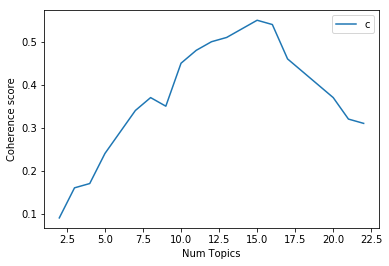

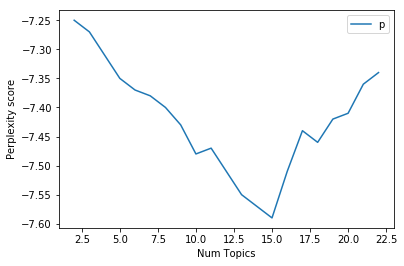

Num Topics = 2  has Coherence Value of 0.09
Num Topics = 3  has Coherence Value of 0.16
Num Topics = 4  has Coherence Value of 0.17
Num Topics = 5  has Coherence Value of 0.24
Num Topics = 6  has Coherence Value of 0.29
Num Topics = 7  has Coherence Value of 0.34
Num Topics = 8  has Coherence Value of 0.37
Num Topics = 9  has Coherence Value of 0.35
Num Topics = 10  has Coherence Value of 0.45
Num Topics = 11  has Coherence Value of 0.48
Num Topics = 12  has Coherence Value of 0.5
Num Topics = 13  has Coherence Value of 0.51
Num Topics = 14  has Coherence Value of 0.53
Num Topics = 15  has Coherence Value of 0.55
Num Topics = 16  has Coherence Value of 0.54
Num Topics = 17  has Coherence Value of 0.46
Num Topics = 18  has Coherence Value of 0.43
Num Topics = 19  has Coherence Value of 0.4
Num Topics = 20  has Coherence Value of 0.37
Num Topics = 21  has Coherence Value of 0.32
Num Topics = 22  has Coherence Value of 0.31
coherence values computed
Num Topics = 2  has Perplexity Value of

In [3]:
############################################################### Show graph
limit=end; start=begin; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.savefig('coherence.png')
plt.show()
##############################################################

plt.plot(x, perplexity_values)
plt.xlabel("Num Topics")
plt.ylabel("Perplexity score")
plt.legend(("perplexity_values"), loc='best')
plt.savefig('perplexity.png')
plt.show()
##########################




#Topic models are evaluated based on their ability to describe documents well (i.e. low perplexity) 
#and to produce topics that carry coherent semantic meaning (high coherence).

#perplexity:inability to deal with or understand something complicated or unaccountable.
#coherence: the quality of forming a unified whole
#ultimate aim is to make perplexity as low as possible and coherence as high as possible
count=1
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
print("coherence values computed")

for m, cv in zip(x, perplexity_values):
    print("Num Topics =", m, " has Perplexity Value of", round(cv, 4))
print("perplexity values computed")

In [ ]:
optimal_model = model_list[13]
model_topics = optimal_model.show_topics(formatted=False)
# pprint(optimal_model.print_topics(num_words=10))


def format_topics_sentences(ldamodel, corpus=corpus, texts=data):
    sent_topics_df = pd.DataFrame()
    # Get main topic in each document
#     print("1")
    for i, row in enumerate(ldamodel[corpus]):
#         print("2")
        row = sorted(row[0], key=lambda x: (x[1]))#, reverse=True)
#         print("3")
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
#             print("4")
            if j == 0:  # => dominant topic
#                 print("5")
                wp = ldamodel.show_topic(topic_num)
#                 print("6")
                topic_keywords = ", ".join([word for word, prop in wp])
#                 print("7")
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
#                 print("8")
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
#     print("9")
    # Add original text to the end of the output
    contents = pd.Series(texts)
#     print("10")
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
#     print("11")
    return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=list(df['body']))

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Topic_Keywords', 'Text']

# print("done")

df_dominant_topic.to_csv("./df_dominant_topic.csv",index=False)

# RESULTS FOR RUNNING THE MODEL WITH JUST 6 TOPICS AND PLOTTING THOSE USING PYLDAVIZ

# Document Wise Topic Contribution

In [10]:
# # Show
# df_dominant_topic.head(20)
                                            #NUMBER OF DOCUMENTS RELATED TO A TOPIC                                                
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()
topic_counts =pd.DataFrame({'Topics':topic_counts.index, 'Num_Documents':topic_counts.values})#converted the pandas series to a dataframe
topic_counts=topic_counts.set_index('Topics')
# print(topic_counts)



# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)
# print(topic_contribution)


# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']].reset_index(drop=True)
topic_num_keywords=topic_num_keywords.drop_duplicates()
# topic_num_keywords.head()
topic_num_keywords = topic_num_keywords.set_index('Dominant_Topic')
# topic_num_keywords.head()


# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1).reset_index()
# df_dominant_topics.head()

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic_Id', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic_Id,Topic_Keywords,Num_Documents,Perc_Documents
0,0.0,"[acts, trump, task, crime, force, executive]",27170,0.1923
1,1.0,"[conspiracy, arrest, charges, crime, robbery, repeat]",21450,0.1553
2,2.0,"[immigrants, china, us, actively, brains, settle]",18590,0.1379
3,3.0,"[doctors, save, patients, health, epidemic, hospital]",15730,0.1103
4,4.0,"[multinational, startups, seed, funding, acquire, merger]",12870,0.0943
5,5.0,"[isis, terrorist, plan, warning, failed, forces]",11440,0.0818


In [27]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word)
vis

/home/dishant/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.053161 -0.013289  1       1        25.260990
5      0.072232  0.044424  2       1        21.098873
2      0.132886 -0.047160  3       1        20.366386
4      0.070268 -0.120813  4       1        11.943475
3     -0.005660  0.191912  5       1        10.969745
1     -0.216566 -0.055074  6       1        10.360530, topic_info=     Category         Freq        Term        Total  loglift  logprob
228   Default  1707.000000  trump       1707.000000  30.0000  30.0000
190   Default  484.000000   republican  484.000000   29.0000  29.0000
939   Default  565.000000   company     565.000000   28.0000  28.0000
666   Default  263.000000   police      263.000000   27.0000  27.0000
2919  Default  301.000000   russia      301.000000   26.0000  26.0000
1056  Default  639.000000   ms          639.000000   25.0000  25.0000
145   Default  510.000000   obama       510.000000   24.0000  24.0000
156   Default  1004.000000  people      1004.000000  23.0000  23.0000
199   Default  4069.000000  say         4069.000000  22.0000  22.0000
121   Default  362.000000   law         362.000000   21.0000  21.0000
2920  Default  264.000000   russian     264.000000   20.0000  20.0000
1539  Default  270.000000   china       270.000000   19.0000  19.0000
665   Default  279.000000   play        279.000000   18.0000  18.0000
878   Default  402.000000   woman       402.000000   17.0000  17.0000
677   Default  167.000000   prison      167.000000   16.0000  16.0000
283   Default  245.000000   attack      245.000000   15.0000  15.0000
764   Default  478.000000   show        478.000000   14.0000  14.0000
1676  Default  152.000000   health      152.000000   13.0000  13.0000
329   Default  274.000000   campaign    274.000000   12.0000  12.0000
2075  Default  206.000000   democrat    206.000000   11.0000  11.0000
553   Default  182.000000   kill        182.000000   10.0000  10.0000
1264  Default  160.000000   game        160.000000   9.0000   9.0000 
220   Default  244.000000   team        244.000000   8.0000   8.0000 
92    Default  490.000000   government  490.000000   7.0000   7.0000 
674   Default  604.000000   president   604.000000   6.0000   6.0000 
68    Default  253.000000   election    253.000000   5.0000   5.0000 
1328  Default  217.000000   military    217.000000   4.0000   4.0000 
147   Default  420.000000   official    420.000000   3.0000   3.0000 
983   Default  142.000000   film        142.000000   2.0000   2.0000 
1667  Default  139.000000   food        139.000000   1.0000   1.0000 
...       ...         ...    ...               ...      ...      ... 
665   Topic6   181.513641   play        279.973907   1.8338  -4.6860 
804   Topic6   34.702869    studio      38.438057    2.1649  -6.3405 
220   Topic6   152.394867   team        244.680450   1.7937  -4.8609 
1123  Topic6   41.495720    song        48.590221    2.1093  -6.1618 
1010  Topic6   52.582169    hollywood   66.434235    2.0333  -5.9250 
764   Topic6   206.463455   show        478.370850   1.4269  -4.5572 
1704  Topic6   81.822922    night       151.137451   1.6535  -5.4828 
567   Topic6   58.795002    light       94.230972    1.7955  -5.8133 
1503  Topic6   64.491486    sunday      113.565315   1.7013  -5.7208 
1003  Topic6   120.424988   good        416.840607   1.0255  -5.0963 
2157  Topic6   44.572598    actor       61.840073    1.9397  -6.0902 
240   Topic6   59.188168    win         113.175552   1.6189  -5.8066 
468   Topic6   118.814415   first       537.749329   0.7573  -5.1098 
144   Topic6   122.609886   new         643.239746   0.6097  -5.0783 
486   Topic6   128.022156   go          805.790344   0.4275  -5.0351 
224   Topic6   137.260025   time        972.358276   0.3093  -4.9655 
199   Topic6   221.683884   say         4069.801270 -0.6429  -4.4861 
262   Topic6   114.368462   also        744.010681   0.3945  -5.1479 
243   Topic6   126.103836

In [ ]:
sent_topics_sorteddf = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf = pd.concat([sent_topics_sorteddf,grp.sort_values(['Perc_Contribution'], ascending=[0]).head(5)],axis=0)

# Reset Index    
sent_topics_sorteddf.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf.head(20)